# Changing Model Weights with RandomForest
- I am going to use RandomForest() in comparing how the class weight effects the outcome
- Models created:
    - RandomForest with Repeated Stratified CV
    - RandomForest with Repeated Stratified CV with Balanced Weighting
    - RandomForest with SMOTE and Repeated Stratified CV with Balanced Weighting
    - RandomForest with SMOTE and Repeated Stratified CV with Manual Weighting

In [10]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline

from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from evaluator import model_evaluate

In [11]:
# Loading data
# file_path = Path("../data/myopia.csv")
file_path = Path("../eda/reduced_filtered_df.csv")
df = pd.read_csv(file_path)
df.head(1)

<IPython.core.display.Javascript object>

,ACD,LT,VCD,SPORTHR,DADMY,delta_spheq,total_positive_screen,MYOPIC
0,3.702,3.392,15.29,4,1,1.358,8,0


In [12]:
# Check dataset balance
df["MYOPIC"].value_counts()

0    323
1     49
Name: MYOPIC, dtype: int64

In [13]:
# Define X,y
label = df["MYOPIC"]
X = df.iloc[:,:-1].copy()

In [14]:
# Note the use of strategy since the dataset is imbalanced. 
# I am isolaating the X_test and y_test from the preprossing 
X_train, X_test, y_train, y_test = train_test_split(X, label, random_state=42, test_size=0.1, stratify=label)

<IPython.core.display.Javascript object>

## RandomForest with Repeated Stratified CV - baseline model, equal weighting, no data balancing

--------------------------------------------------


Cross Validation Prediction Scores - average of 30 runs
Mean f1: 0.199
Mean recall: 0.162
Mean precision: 0.319
Mean ROC AUC: 0.794


--------------------------------------------------


Cross Validation Datasets
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29

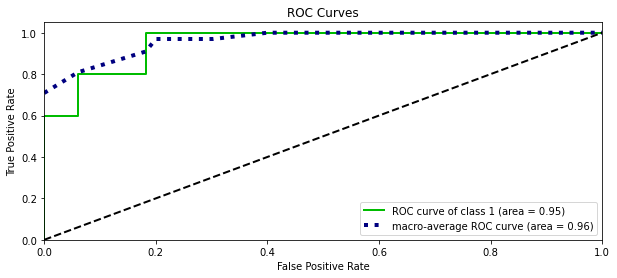



Precision-Recall Curve AUC:  0.81



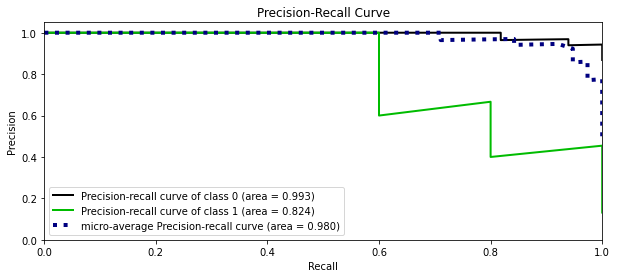

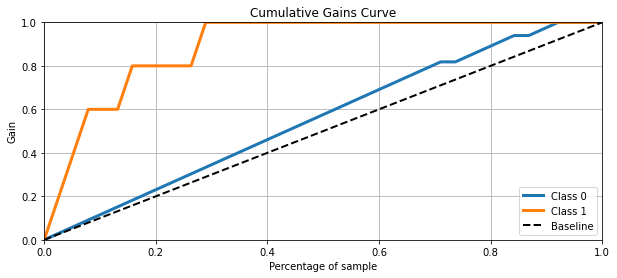

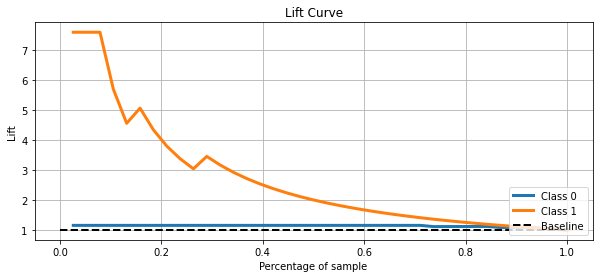



--------------------------------------------------


Print Thresholds

Thresholds        TPR        FPR
       0.0        0.0        0.0
      0.01        0.2        0.0
      0.02        0.6        0.0
      0.03        0.6       0.06
      0.04        0.8       0.06
      0.05        0.8       0.18
      0.06        1.0       0.18
      0.08        1.0       0.21
      0.09        1.0       0.27
      0.14        1.0        0.3
      0.17        1.0       0.52
      0.19        1.0       0.64
      0.24        1.0        0.7
      0.25        1.0       0.88
      0.33        1.0        1.0




In [15]:
scoring = ('f1', 'recall', 'precision', 'roc_auc')
steps = [('model', RandomForestClassifier(random_state=1))]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

model_evaluate(steps, cv, X_train, y_train, X_test, y_test)

## RandomForest with Repeated Stratified CV with Balanced Weighting

--------------------------------------------------


Cross Validation Prediction Scores - average of 30 runs
Mean f1: 0.107
Mean recall: 0.070
Mean precision: 0.250
Mean ROC AUC: 0.798


--------------------------------------------------


Cross Validation Datasets
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29

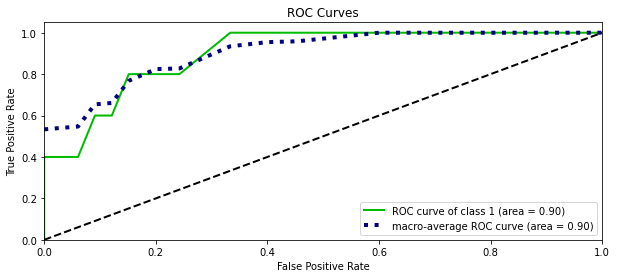



Precision-Recall Curve AUC:  0.65



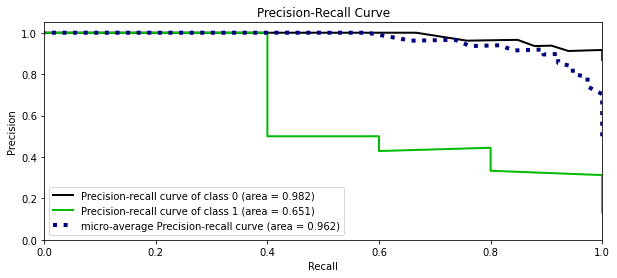

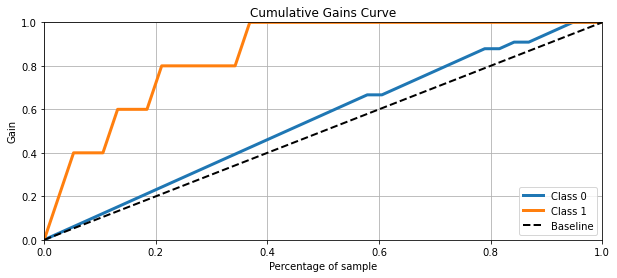

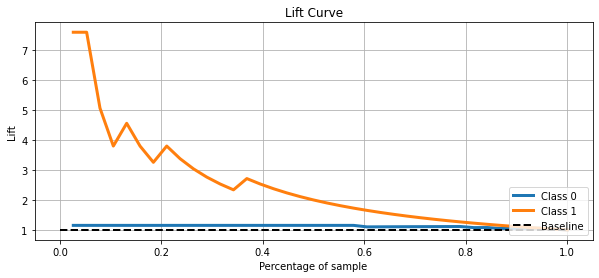



--------------------------------------------------


Print Thresholds

Thresholds        TPR        FPR
       0.0        0.0        0.0
      0.01        0.2        0.0
      0.02        0.4        0.0
      0.03        0.4       0.06
      0.04        0.6       0.09
      0.05        0.6       0.12
      0.08        0.8       0.15
      0.09        0.8       0.24
       0.1        1.0       0.33
      0.23        1.0       0.45
      0.24        1.0       0.64
      0.33        1.0       0.79
      0.34        1.0        1.0




In [16]:
scoring = ('f1', 'recall', 'precision', 'roc_auc')
steps = [('model', RandomForestClassifier(class_weight="balanced", random_state=1))]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

model_evaluate(steps, cv, X_train, y_train, X_test, y_test)

## RandomForest with SMOTE and Repeated Stratified CV with Balanced Weighting

--------------------------------------------------


Cross Validation Prediction Scores - average of 30 runs
Mean f1: 0.387
Mean recall: 0.462
Mean precision: 0.357
Mean ROC AUC: 0.811


--------------------------------------------------


Cross Validation Datasets
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29

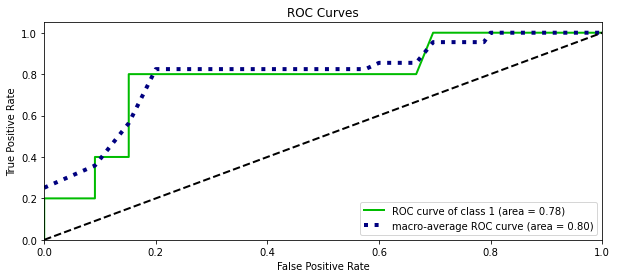



Precision-Recall Curve AUC:  0.45



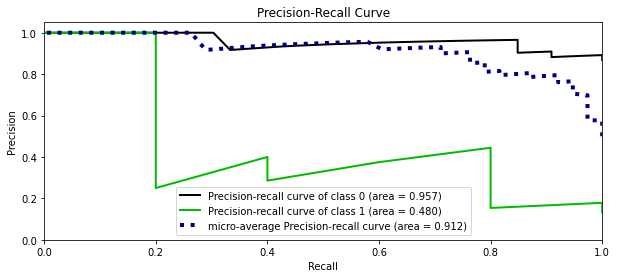

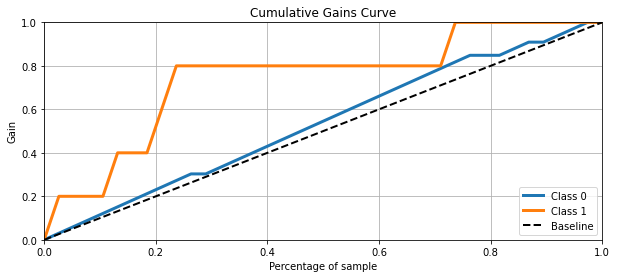

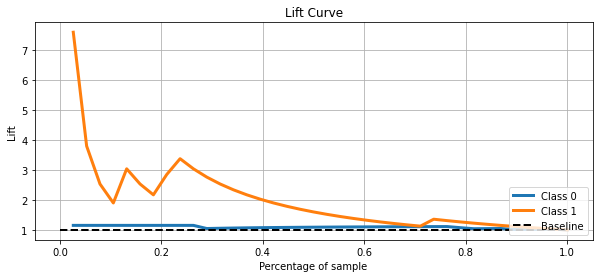



--------------------------------------------------


Print Thresholds

Thresholds        TPR        FPR
     0.013        0.0        0.0
      0.02        0.2        0.0
     0.027        0.2       0.09
      0.04        0.4       0.09
     0.047        0.4       0.15
     0.053        0.8       0.15
      0.06        0.8       0.27
     0.067        0.8       0.33
     0.073        0.8       0.39
     0.087        0.8       0.48
     0.093        0.8       0.55
      0.12        0.8       0.58
     0.127        0.8       0.67
     0.187        1.0        0.7
     0.193        1.0       0.73
      0.22        1.0       0.79
     0.293        1.0       0.88
       0.4        1.0        1.0




In [17]:
irfc = RandomForestClassifier(class_weight="balanced", n_estimators=150, random_state=1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision', 'roc_auc')
steps = [('over', SMOTE()), ('model', irfc)]
model_evaluate(steps, cv, X_train, y_train, X_test, y_test)

In [18]:
## RandomForest with SMOTE and Repeated Stratified CV with Manual Weighting

--------------------------------------------------


Cross Validation Prediction Scores - average of 30 runs
Mean f1: 0.382
Mean recall: 0.450
Mean precision: 0.344
Mean ROC AUC: 0.811


--------------------------------------------------


Cross Validation Datasets
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29

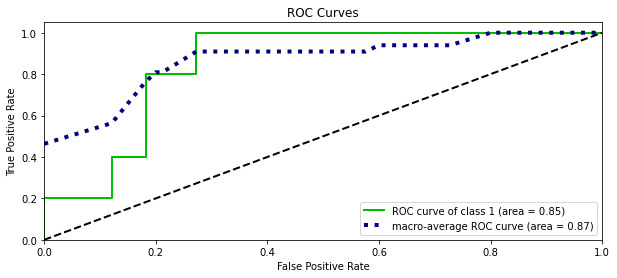



Precision-Recall Curve AUC:  0.45



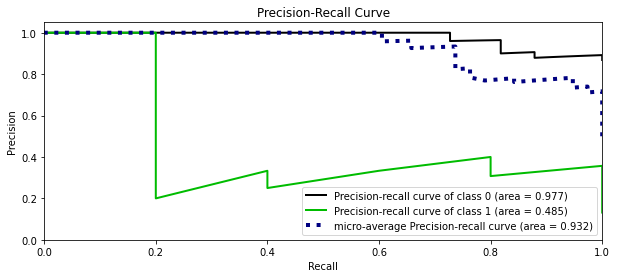

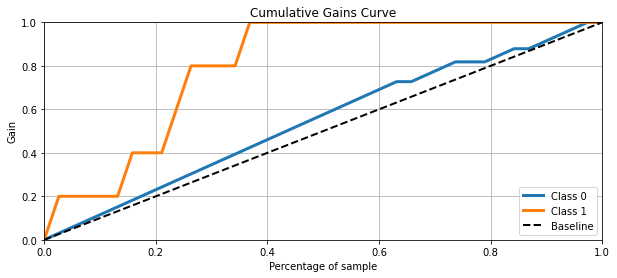

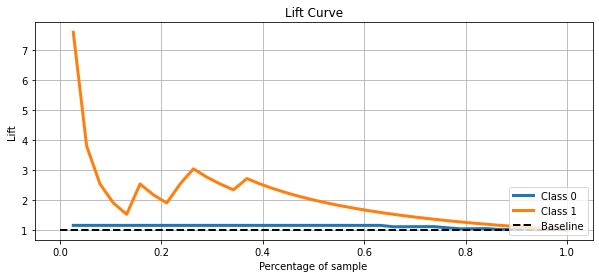



--------------------------------------------------


Print Thresholds

Thresholds        TPR        FPR
     0.007        0.0        0.0
     0.013        0.2        0.0
      0.02        0.2       0.12
     0.027        0.4       0.12
     0.033        0.4       0.18
     0.047        0.8       0.18
     0.053        0.8       0.21
      0.06        0.8       0.27
     0.073        1.0       0.27
     0.087        1.0       0.36
     0.113        1.0       0.55
      0.12        1.0       0.58
     0.133        1.0       0.67
     0.153        1.0       0.73
     0.187        1.0       0.88
     0.293        1.0        1.0




In [19]:
irfc = RandomForestClassifier(class_weight={0:0.25, 1:0.75}, n_estimators=150, random_state=1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision', 'roc_auc')
steps = [('over', SMOTE()), ('model', irfc)]
model_evaluate(steps, cv, X_train, y_train, X_test, y_test)

## Summary

Interesting that Random Forest only improved with SMOTE and Balanced Weighting Applied.  

RandomForest with Repeated Stratified CV
    Mean f1: 0.199
    Mean recall: 0.162
    Mean precision: 0.319
    Mean ROC AUC: 0.794
RandomForest with Repeated Stratified CV with Balanced Weighting
    Mean f1: 0.107
    Mean recall: 0.070
    Mean precision: 0.250
    Mean ROC AUC: 0.798
RandomForest with SMOTE and Repeated Stratified CV with Balanced Weighting
    Mean f1: 0.387
    Mean recall: 0.462
    Mean precision: 0.357
    Mean ROC AUC: 0.811
RandomForest with SMOTE and Repeated Stratified CV with Manual Weighting (1:3)
    Mean f1: 0.382
    Mean recall: 0.450
    Mean precision: 0.344
    Mean ROC AUC: 0.811
   